# Applications of Derivatives
In this notebook, I explore the various applications of derivatives including:
- Graphing functions
- Identifying absolute maxima & minima
- Identifying local maxima & minima
- Convexity
- Basic optimization
<br>
For implementations of numerical derivative and limit calculations, see the .cpp files in this directory.

In [98]:
# Notebook Imports
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")

To start, we begin by defining the function:<br>
$f(x)=2x^3-3x^2-3x+2$<br>
I chose this funtion because it produces a nice cubic S-shaped curve on a relatively narrow interval.

In [99]:
def f(x):
    """ Function f(x) """
    return (2 * x ** 3) - (3 * x ** 2) - (3 * x) + 2

To compute the derivative of the function f(x), the numerical method used is the central difference approximation. Given a small change in x (x + h, where h is a small number), the central difference approximation takes the average of the equally spaced points around the central point. This method leads to a more accurate appoximation than that of the forward or backward approximation methods. It also converges faster than both numerical methods, as explored in numerical_derivatives.cpp.<br>
The central difference approximation is given by:<br><br>
$f'(x) \approx \frac{f(x+h)-f(x-h)}{2h}$

In [100]:
def f_prime(x, h=0.001):
    """ Central difference approximation """
    return (f(x+h) - f(x-h)) / (2*h)

In [101]:
# Compute the function values on the interval
x = np.linspace(-3, 4, 50)
y = f(x)

# Compute the derivative function on the interval
d_dx = f_prime(x)

### 1. Graphing Function & Derivatives
The first exploration graphs the function values and the derivative function values over the interval [-3, 4]. As we can see, the function is a cubic (3rd degree), and the derivative function a degree less, a parabola (2nd degree). The derivative function shows where the function is increasing and decreasing, as well as the critical points marking where changes occur.

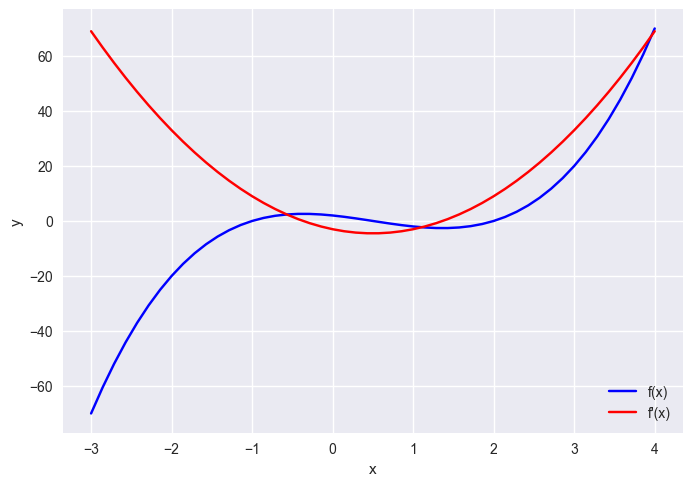

In [102]:
# Plot f(x) and f'(x)
plt.plot(x, y, c='b', label='f(x)')
plt.plot(x, d_dx, c='r', label="f'(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()